# <font color='#eb3483'>$K$-Means Clustering</font>

In this notebook, we are going to apply clustering algorithm to identify homogenous groups of customers from the `mall_customer.csv` dataset.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### <font color='#eb3483'>Import and Explore the Data</font>

In [3]:
df = pd.read_csv("/Users/mollyrudisill/ix24_mollyr/ix_datascience-main/classwork/data/mall_customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.shape

(200, 5)

In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<font color='#eb3483'> Explore your data. How large is it? Are there any missing values? What are the data types?

In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

<font color='#eb3483'> The income and spending score columns have pretty awkward names. Rename them as "AnnualIncome" and "SpendingScore", respectively.

In [7]:
# rename the columns
df.rename(columns={"Annual Income (k$)": "AnnualIncome", "Spending Score (1-100)": "SpendingScore"}, inplace=True)
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<font color='#eb3483'>Visualize the `Age` and `SpendingScore` distinguished by `Gender`.

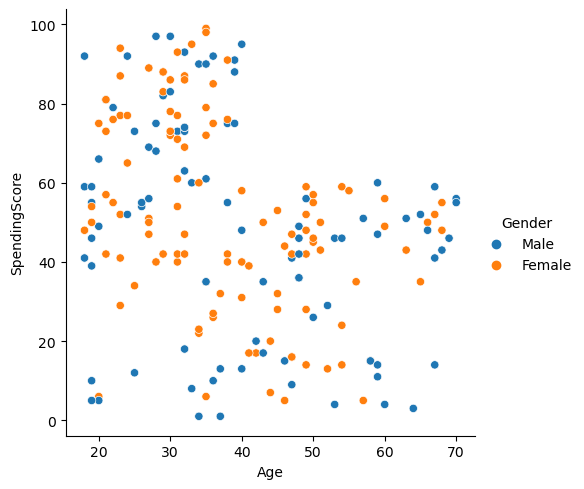

In [8]:
sns.relplot(x="Age", y="SpendingScore", data=df, hue="Gender")

### <font color='#eb3483'> Apply $K$-Means Clustering </font>

Let's attempt to identify clusters based on Age and SpendingScore. Using two variables will allow us to visualize the results, but feel free to re-run this with all the continuous variables. K-means clustering is not suitable for categorical variables.

In [9]:
from sklearn.cluster import KMeans

<font color='#eb3483'>Have a look at the help for `KMeans`. What do the "init" and "n_init" arguments do?

In [10]:
?KMeans

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centroids using sampling based on
    an empirical probability distribution of the points' contribution to the
    overall inertia. This technique speeds up convergence, and is
    theoretically proven to be :math:`\mathcal{O}(\log k)`-optimal.
    See the description of `n_init` for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for

Let's perform K-means clustering with K=4 (no particular reason, just as an example!)...

In [11]:
km = KMeans(n_clusters=4) # K = 4
km.fit(df[['Age','SpendingScore']])

KMeans(n_clusters=4)

In [12]:
# Create a DataFrame from the cluster centers of a KMeans model
# km.cluster_centers_ contains the centroids of each cluster

pd.DataFrame(km.cluster_centers_, columns=['Age','SpendingScore'], index=['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'])

,Age,SpendingScore
Cluster1,27.617021,49.148936
Cluster2,30.175439,82.350877
Cluster3,43.291667,15.020833
Cluster4,55.708333,48.229167


In [13]:
# Add a new column 'Cluster' to the DataFrame df
# km.labels_ contains the cluster labels assigned by KMeans (starting from 0)

df['Cluster'] = km.labels_ + 1
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,1


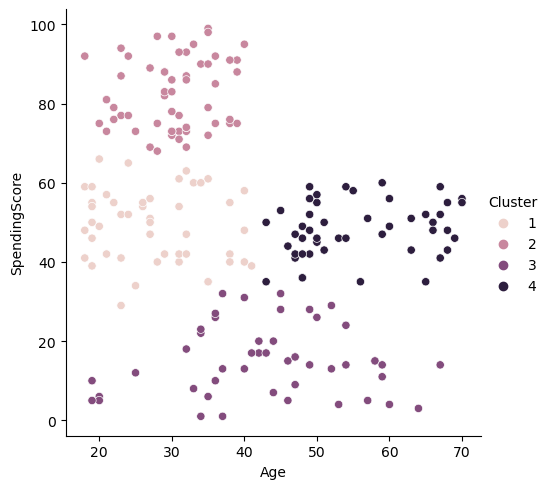

In [14]:
sns.relplot(x="Age", y="SpendingScore", data=df, hue="Cluster")

### <font color='#eb3483'> Finding the Best $K$ </font>

The `sklearn` `KMeans` method calls the total within-cluster variation "inertia". This is stored as the `inertia_` attribute of the fitted object. Next, we will loop over different values of $K$, store the inertia and choose the best value of $K$ using the "elbow" method.

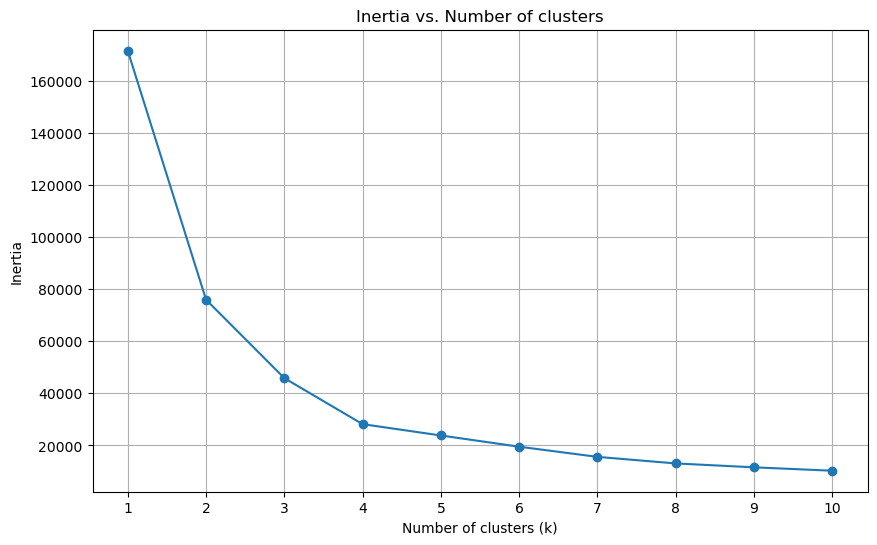

In [15]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df[['Age','SpendingScore']])
    inertia.append(kmeans.inertia_)

# Plotting the inertia values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of clusters')
plt.xticks(np.arange(1, 11, 1))  # Set x-axis ticks to integers
plt.grid(True)
plt.show()

<font color='#eb3483'>Exercise: </font> How many clusters would you select? (There is no single "right" answer.)

# <font color='#eb3483'> Hierarchical Clustering </font>

Let's try hierarchical clustering instead...

In [16]:
from sklearn.cluster import AgglomerativeClustering
?AgglomerativeClustering

Init signature:
AgglomerativeClustering(
    n_clusters=2,
    *,
    affinity='euclidean',
    memory=None,
    connectivity=None,
    compute_full_tree='auto',
    linkage='ward',
    distance_threshold=None,
    compute_distances=False,
)
Docstring:     
Agglomerative Clustering.

Recursively merges pair of clusters of sample data; uses linkage distance.

Read more in the :ref:`User Guide <hierarchical_clustering>`.

Parameters
----------
n_clusters : int or None, default=2
    The number of clusters to find. It must be ``None`` if
    ``distance_threshold`` is not ``None``.

affinity : str or callable, default='euclidean'
    Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
    "manhattan", "cosine", or "precomputed".
    If linkage is "ward", only "euclidean" is accepted.
    If "precomputed", a distance matrix (instead of a similarity matrix)
    is needed as input for the fit method.

memory : str or object with the joblib.Memory interface, default=None
    Us

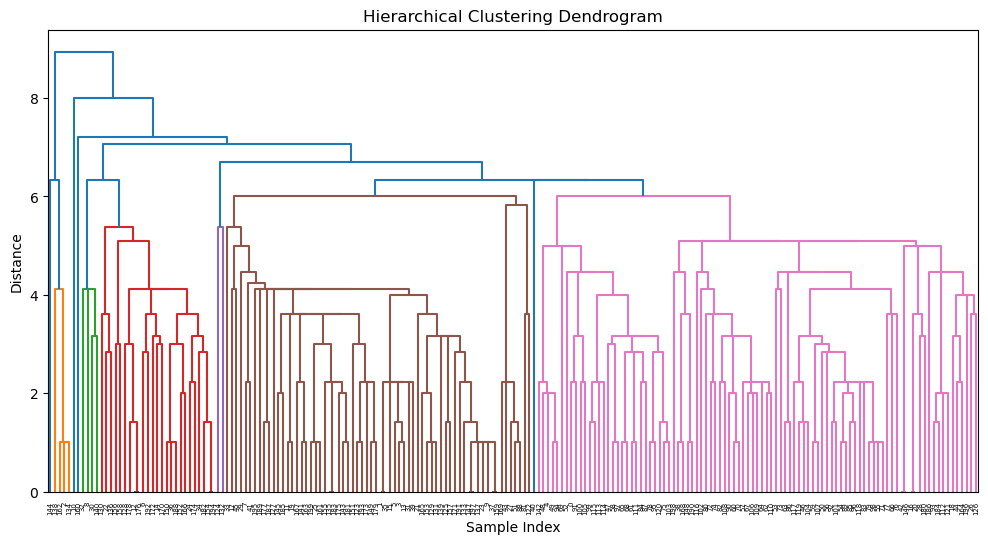

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
Z = linkage(df[['Age', 'SpendingScore']])

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

Lets apply 3 clusters

In [18]:
# Perform agglomerative clustering
hier = AgglomerativeClustering(n_clusters=3, linkage='ward')
hier.fit(df[['Age', 'SpendingScore']])

AgglomerativeClustering(n_clusters=3)

In [19]:
df['Cluster'] = hier.labels_ + 1
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,1


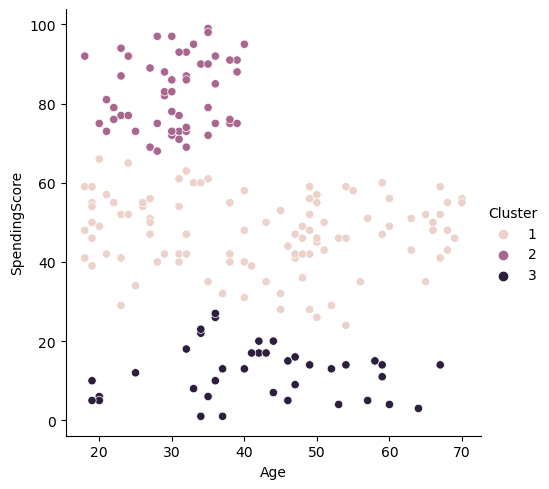

In [20]:
sns.relplot(x="Age", y="SpendingScore", data=df, hue="Cluster")

## Evaluating clustering

* Silhouette Score: The silhouette score measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

* Davies-Bouldin Index: This index measures the average similarity between each cluster and its most similar cluster, taking into account the cluster's size. It ranges from 0 to infinity, with lower values indicating better clustering.

* Calinski-Harabasz Index (Variance Ratio Criterion): This index compares the ratio of the variance within clusters with the variance between clusters. A higher value indicates better clustering.
* Visual Inspection: Sometimes, simply visualizing the clusters can provide insight into the quality of clustering. Scatter plots, heatmaps, and other visualization techniques can help assess how well the data points are grouped.

* Domain Knowledge: In many cases, domain knowledge is essential for evaluating clustering results. Subject matter experts can assess whether the clusters make sense in the context of the data and the problem domain.

In [21]:
from sklearn.metrics import silhouette_score

# Assuming labels are the cluster labels obtained from AgglomerativeClustering

hier = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = hier.fit_predict(df[['Age', 'SpendingScore']])

silhouette_avg = silhouette_score(df[['Age', 'SpendingScore']], labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4411791686353356
